In [134]:
### Importing required libraries and data ###

import tensorflow as tf 
from tensorflow import keras
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
# Loading data for preprocessing

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [136]:
# Training and test data formating *This is not require but here to help visulize the data*

#returns the size of the first object
X_train[0].shape

(28, 28)

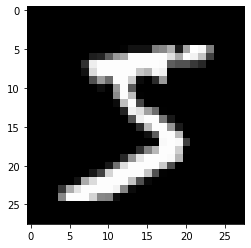

In [137]:
#Shows the image
plt.imshow(X_train[0],cmap='gray')

In [138]:
y_train[0]

5

In [139]:
### Preprocessing the Training Data ###

image_hight,image_width = 28,28

#Since each pixle of the image will be a node input the data is reshaped to be one long vector
X_train = X_train.reshape(60000,image_hight*image_width)
X_test = X_test.reshape(10000, image_hight*image_width)
print(X_train.shape)
print(X_test.shape)

# Because the data is in gray scale the values are between 0 and 255.  The format needs to be change
# so it can represent a neurons activation.  Here the data type is change to float to incorporate decimals
# and then the data is divided by 255 to achieve a range of 0-1.
X_train.astype('float32')
X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

(60000, 784)
(10000, 784)


In [140]:
### Preprocessing the Test Data ###

#Converts the y data from a number such as 5 it will return a binary vector inrepresentation ie. 0, 0, 0, 0, 0, 1, 0, 0, 0, 0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [141]:
### Building the Model ###

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))  
    # Dense is a fully connected node
    # relu is an activation funtion for applying rectified linear unit activation (_/ shape)

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))
    # makes the output one out of the ten classes

In [142]:
### Compiling the Model ###

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    # adam is a algorithm that optimizes with a stochastic gradient descent method
    # the categorical crossentropy allow for the ten output nodes
    # accurancy - This metric creates two local variables, total and count that are used to 
    # compute the frequency with which y_pred matches y_true.
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [143]:
### Train the Model ###

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1848 - accuracy: 0.9432 - val_loss: 0.0995 - val_accuracy: 0.9694
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0771 - accuracy: 0.9757 - val_loss: 0.0907 - val_accuracy: 0.9713
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0717 - val_accuracy: 0.9793
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0702 - val_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0782 - val_accuracy: 0.9808
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.1025 - val_accuracy:

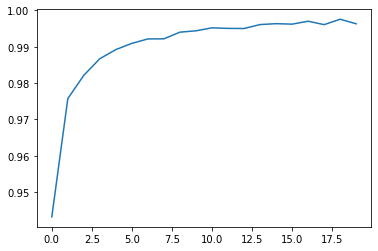

In [144]:
### Model Accuracy ###

plt.plot(history.history['accuracy'])

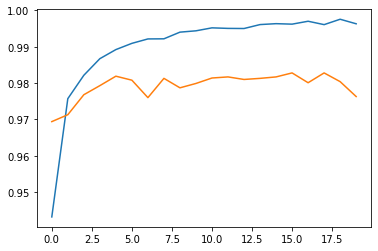

In [145]:
### Accuracy of Training and Validation with Loss ###

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

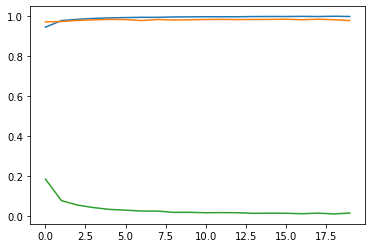

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])


In [147]:
### Evaluating the Model ###

score = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9763
